## Regression Discontinuity
- Difference In Difference, Synthetic Control 방법과 달리 Treatment 이전 기간에서의 Pre-Treatment Outcome이 없어도 된다.
  
  - 사실 Pannel Data라면, Difference In Difference, Synthetic Control, Regression Discontinuity 모두 활용 가능하다.
  
- Treatment Group과 Control Group이 임의의 cutoff에 의해서 구분되는 Research Design이다.

  - cutoff: 어떤 변수(Running Variable)의 특정 값으로써 Outcome이나 Confounder와 관계없이 임의로 정해진 기준이어야 한다.

  - Running Variable: 연속형 변수이며, Treatment와 Outcome 변수에 영향을 주는 교란요인처럼 연관이 존재할 수 있다. 

  - 불연속 회귀분석에서는 cutoff 직전의 데이터를 통해서 이후에 Continous하게 측정된다고 가정하면, 이를 Counterfactual이라고 부른다.

#### Regression Discontinuity Counterfactual Example
- 오른쪽 파란색 값은 가상의 값이다.

"Counterfactual Potential Outcomes


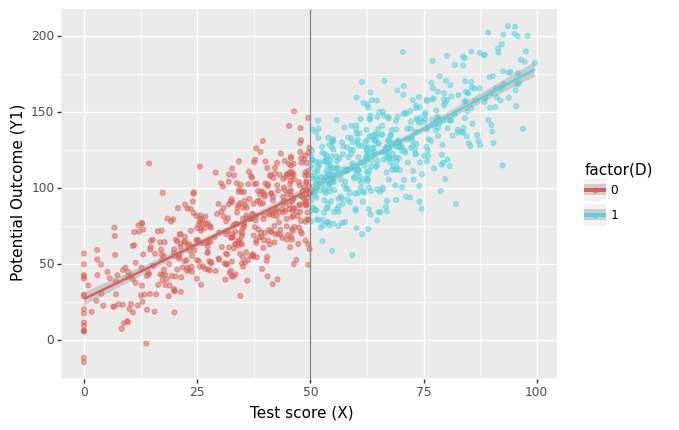

<ggplot: (157883325069)>

In [21]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

np.random.seed(12282020)

dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
dat.loc[dat.x>50, 'D'] = 1
dat['y1'] = 25 + 0*dat.D + 1.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
dat['y2'] = 25 + 40*dat.D + 1.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
print('"Counterfactual Potential Outcomes')


p1 = p.ggplot(dat, p.aes(x='x', y='y1', color = 'factor(D)')) +    p.geom_point(alpha = 0.5) +    p.geom_vline(xintercept = 50, colour = "grey") +    p.stat_smooth(method = "lm", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y1)")

- 오른쪽 파란색 값은 cutoff에 의해 발생된 실제값이다.

"Counterfactual Potential Outcomes after Treatment


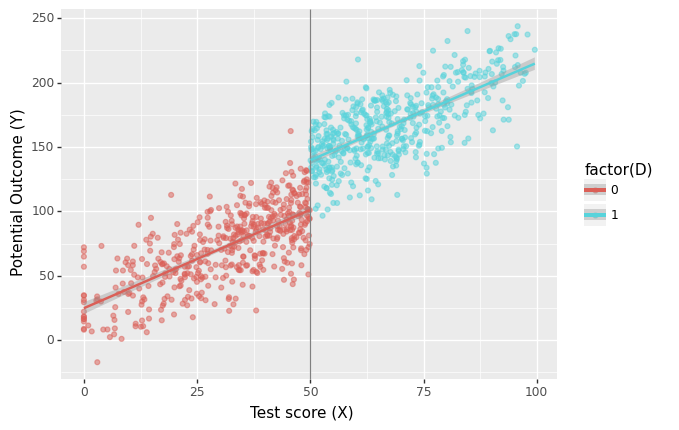

<ggplot: (157882884737)>

In [22]:
print('"Counterfactual Potential Outcomes after Treatment')

p.ggplot(dat, p.aes(x='x', y='y2', color = 'factor(D)')) +    p.geom_point(alpha = 0.5) +    p.geom_vline(xintercept = 50, colour = "grey") +    p.stat_smooth(method = "lm", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

### Two Considerations
- Non-Parametric과 Parametric 의 결정
  
  - Non-Parametric은 $Y$의 평균을 통해 ATE를 추정하며, Parametric은 cutoff 주변(Bandwidth)에서의 값을 Running Variable의 함수 (Control Function)로 예측한 후, coutoff를 기점으로 ATE를 추정한다.
  
    - Control Function: Selection Bias를 통제하기 위해 도입한 함수다.

- Bandwidth 설정
  - cutoff 중심에서 좌,우의 길이를 조절하여 ATE를 추정한다.
  
  - Bandwidth울 좁힐수록 샘플의 숫자가 줄어들기 때문에 통계 추정에 Variance가 커지는 단점이 있다. 하지만, Bandwidth을 늘리면 cutoff와 관련없는 다른 요인들에 의해 Selection Bias가 커질 가능성이 있다.

### Challenges to Identification
- McCrary’s density test
  - 만약 cutoff가 무작위에 가깝다면, 분석 대상들이 cutoff를 중심으로 불연속적으로 분포되어 있지 않을 것이다.
  
    - Ex) 만약 관측값들이 cutoff 시점을 알고 있다면, 관측값들이 인위적으로 cutoff 이전으로 옮길수도 있고, 그 이후로 옮겨갈 수도 있는 상황처럼 데이터의 불균형이 발생하면 회귀 불연속 분석을 진행할 수 없다.

- Covariate balance and other placebos
  - running variable에서의 cutoff와 외부 요인들의 관계를 살펴보는 것이다. 이를 통해서 만약 cutoff와 외부 요인들의 관계에서 불균형이 일어나지 않는다면, 오직 cutoff는 $Y$에 영향을 준 것임을 합리적으로 추론해 볼 수 있다.

- Assumptions of Control Functions
  - 통제함수를 어떻게 가정하느냐에 따라서 ATE의 값이 달라질 수 있다. $(ATE=\beta_0)$

    - $linear:\; Y_i=\alpha+\beta_0*T_i+\beta_1*\gamma_i+\epsilon$
    - $linear\;interaction:\; Y_i=\alpha+\beta_0*T_i+\beta_1*\gamma_i+\beta_2*\gamma_i*T_i+\epsilon$
    - $quadratic:\; Y_i=\alpha+\beta_0*T_i+\beta_1*\gamma_i+\beta_2*\gamma_i^2+\epsilon$
    - $quadratic\;interaction:\; Y_i=\alpha+\beta_0*T_i+\beta_1*\gamma_i+\beta_2*\gamma_i^2+\beta_3*\gamma_i*T_i+\beta_4*\gamma_i^2*T_i+\epsilon$
    - $cubic:\; Y_i=\alpha+\beta_0*T_i+\beta_1*\gamma_i+\beta_2*\gamma_i^2+\beta_3*\gamma_i^3+\epsilon$
    - $cubic\;interaction:\; Y_i=\alpha+\beta_0*T_i+\beta_1*\gamma_i+\beta_2*\gamma_i^2+\beta_3*\gamma_i^3+\beta_4*\gamma_i*T_i+\beta_5*\gamma_i^2*T_i+\beta_6*\gamma_i^3*T_i+\epsilon$

  - 또한, cutoff 전/후에 따라 통제함수가 달라진다고 가정할 수 있다.
    - $linear:\; Y_i=\alpha+\beta_0*T_i+\beta_1f(rv-cutoff)+\beta_2f'(rv-cutoff)+\epsilon$
      
      - $rv-cutoff$는 Intercept를 $cutoff$에 맞추기 위함이다.
      
      - 따라서 $cutoff$ 전에는 $\beta_0+f(rv-cutoff)$라면, $cutoff$ 후에는 $\beta_0+\beta_1+f(rv-cutoff)+f'(rv-cutoff)$ 이다.

#### McCrary’s density test Example
- 첫 번째 그림은 cutoff(0)에서 random하게 분포하지만, 두 번째 그림은 cutoff 바로 위의 급증된 사실을 보아 random하지 않고 조작된 분포를 생각해볼 수 있다.
  
- 즉, 두 번째 그림의 경우 불연속 회귀분석을 수행하기 어렵다.

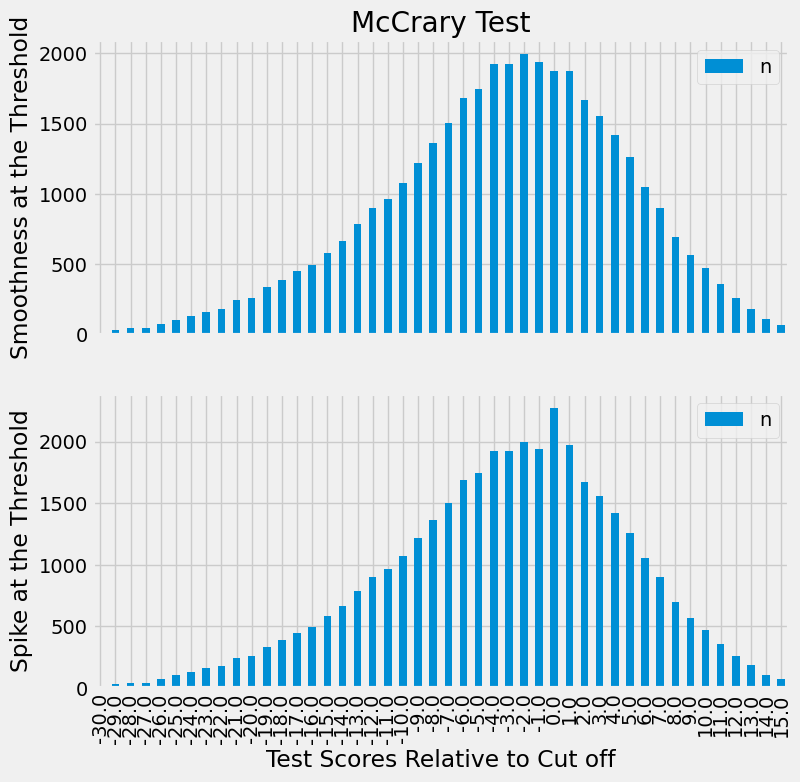

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

sheepskin = pd.read_csv("C:\\Users\\socsoft\\Downloads\\sheepskin.csv")[["avgearnings", "minscore", "receivehsd", "n"]]

plt.figure(figsize=(8,8))

ax = plt.subplot(2,1,1)
sheepskin.plot.bar(x="minscore", y="n", ax=ax)
plt.title("McCrary Test")
plt.ylabel("Smoothness at the Threshold")

ax = plt.subplot(2,1,2, sharex=ax)
sheepskin.replace({1877:1977, 1874:2277}).plot.bar(x="minscore", y="n", ax=ax)
plt.xlabel("Test Scores Relative to Cut off")
plt.ylabel("Spike at the Threshold")
plt.show()  # Display the plot


#### Sharp RD Example
- 알코올이 사망에 미치는 영향 추정
  - 미국에서 21세부터 술을 마실 수 있기 때문에 cutoff는 21로 정의하여 분석

In [30]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

style.use("fivethirtyeight")

drinking = pd.read_csv("C:\\Users\\socsoft\\Downloads\\drinking.csv")
drinking.head()[["agecell", "all"]]

drinking["agecell"] -= 21

rdd_df = drinking.assign(threshold=(drinking["agecell"] > 0).astype(int))

model = smf.wls("all~agecell*threshold", rdd_df).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,93.6184,0.932,100.399,0.000,91.739,95.498
agecell,0.8270,0.819,1.010,0.318,-0.823,2.477
threshold,7.6627,1.319,5.811,0.000,5.005,10.320
agecell:threshold,-3.6034,1.158,-3.111,0.003,-5.937,-1.269


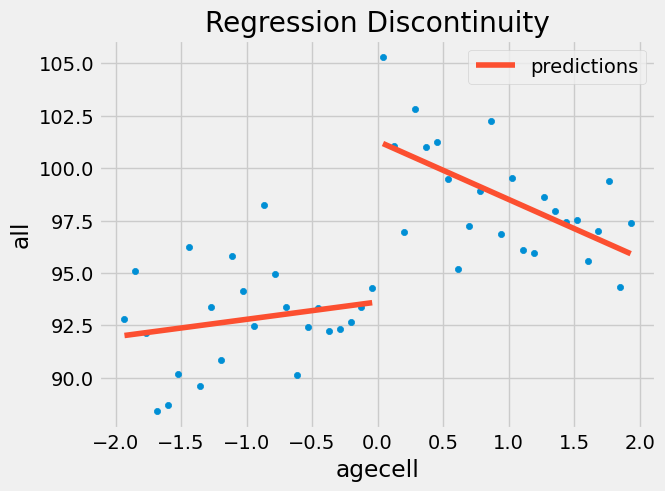

In [31]:
ax = drinking.plot.scatter(x="agecell", y="all", color="C0")
drinking.assign(predictions=model.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

### Kernel Weighting
 - 불연속 회귀분석은 cutoff를 기준으로 전/후 양 끝에 차이를 비교한다. 하지만, 이상치 값들에 의해서 잘못 추정될 가능성이 있다.
 
 - 이를 해결할 수 있는 방법은 가까운 데이터에 더 높은 가중치를 부여하는 것이다.
  
   - 일반적으로 삼각 커널(triangular kernel) 방법이 있다.
     - $K(R, c, h) = \mathcal{1}\{|R-c| \leq h\} * \bigg(1-\frac{|R-c|}{h}\bigg)$
     - $\mathcal{1}\{|R-c| \leq h\}$는 어떤 데이터가 임계값에 가까운지 알려주며, $h$가 bandwidth(경계)를 결정한다.
     - $1-\frac{|R-c|}{h}$는 가중치 함수이므로 임계값에서 멀어질수록 가중치가 점점 작아지고, $h$가 큰 값이라면 가중치는 더 느린 속도로 작아지지만 $h$가 작은 값이라면 더 빠른 속도로 0에 수렴하게 된다.

#### Kernel Weighting Example
- 알코올이 사망에 미치는 영향을 Weighting하여 다시 추정해보자.

In [33]:
def kernel(R, c, h):
    indicator = (np.abs(R-c) <= h).astype(float)
    return indicator * (1 - np.abs(R-c)/h)

In [34]:
model = smf.wls("all~agecell*threshold", rdd_df,
                weights=kernel(drinking["agecell"], c=0, h=1)).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,93.2002,0.731,127.429,0.000,91.726,94.674
agecell,0.4109,1.789,0.230,0.819,-3.196,4.017
threshold,9.7004,1.034,9.378,0.000,7.616,11.785
agecell:threshold,-7.1759,2.531,-2.835,0.007,-12.276,-2.075


- 기존 분석에 비해 회귀선이 더 가파른 사실을 알 수 있다.

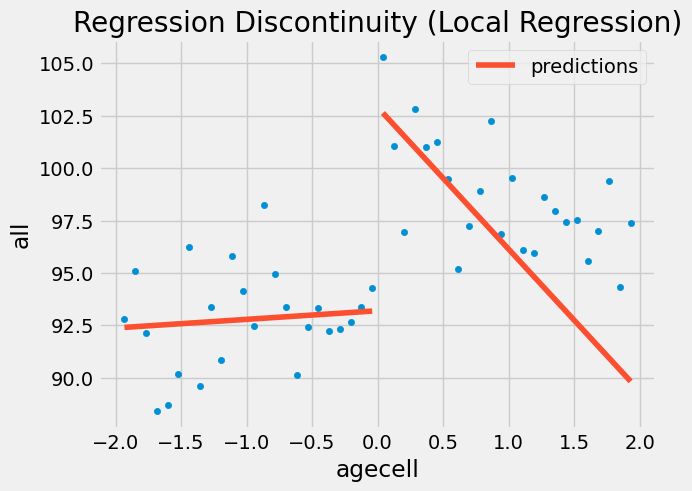

In [35]:
ax = drinking.plot.scatter(x="agecell", y="all", color="C0")
drinking.assign(predictions=model.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity (Local Regression)");

### Fuzzy Design
- cutoff에 의해서 Treatment를 받을지 여부가 100% 결정되는 것이 아니고, 확률에 의해 결정되는 분석 방법이다.
 
  - 도구 변수를 활용해서 분석할 수 있다. (위 그래프를 살펴보면 도구변수가 왜 사용될 수 있는지 알 수 있을 것이다.)
  
  - cutoff가 도구변수의 역할을 한다.

  - 따라서 cutoff 이전에서는 영향이 없다가 이후에 영향을 받은 온전한 Compliers Group만 가져와서 LATE를 추정한다.

- First Stage
  - $D=\gamma_0+\gamma_1*AboveCutoff+f(Running\;Variable)+\epsilon$

- Second Stage
  - $Y=\beta_0+\beta_1\hat{D} +f'(Running\;Variable)+\epsilon'$

#### Fuzzy Design Example
- 교육이 소득에 영향을 미치는지 추정
  
  - $Running Variable: minscore$

  - $Treatment: receivehsd$

  - $Y=avgearnings$

  - $Weight: n$

In [62]:
sheepskin = pd.read_csv("C:\\Users\\socsoft\\Downloads\\sheepskin.csv")[["avgearnings", "minscore", "receivehsd", "n"]]
sheepskin.head()

,avgearnings,minscore,receivehsd,n
0,11845.086,-30.0,0.416667,12
1,9205.679,-29.0,0.387097,31
2,8407.745,-28.0,0.318182,44
3,11114.087,-27.0,0.377778,45
4,10814.624,-26.0,0.306667,75


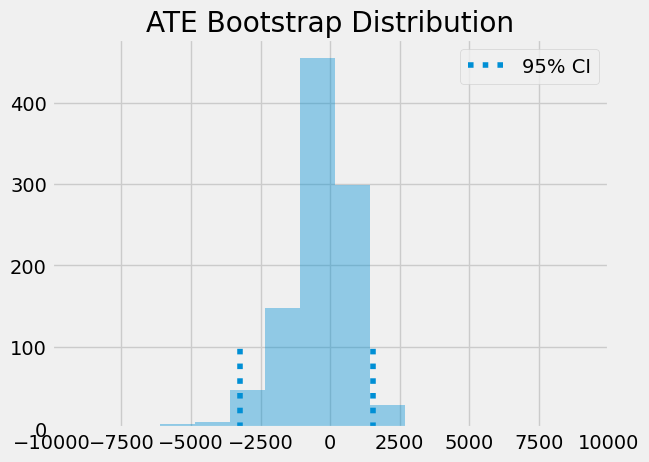

In [61]:
from joblib import Parallel, delayed 

sheepsking_rdd = sheepskin.assign(threshold=(sheepskin["minscore"]>0).astype(int))

def wald_rdd(data):
    weights=kernel(data["minscore"], c=0, h=15)*data["n"]
    denominator = smf.wls("receivehsd~minscore*threshold", data, weights=weights).fit()
    numerator = smf.wls("avgearnings~minscore*threshold", data, weights=weights).fit()
    return numerator.params["threshold"]/denominator.params["threshold"]

np.random.seed(45)
bootstrap_sample = 1000
ates = Parallel(n_jobs=4)(delayed(wald_rdd)(sheepsking_rdd.sample(frac=1, replace=True))
                          for _ in range(bootstrap_sample))
ates = np.array(ates)

sns.distplot(ates, kde=False)
plt.vlines(np.percentile(ates, 2.5), 0, 100, linestyles="dotted")
plt.vlines(np.percentile(ates, 97.5), 0, 100, linestyles="dotted", label="95% CI")
plt.title("ATE Bootstrap Distribution")
plt.xlim([-10000, 10000])
plt.legend()